In [1]:
install.packages("mgcv")
library(mgcv)

package 'mgcv' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mgcv'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\gy17m2a\Documents\R\R-4.0.2\library\00LOCK\mgcv\libs\x64\mgcv.dll to C:\Users\gy17m2a\Documents\R\R-4.0.2\library\mgcv\libs\x64\mgcv.dll: Permission denied"
Warning message:
"restored 'mgcv'"



The downloaded binary packages are in
	C:\Users\gy17m2a\AppData\Local\Temp\RtmpA5mlkd\downloaded_packages


Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.



In [2]:
# Set working directory and import R file for downloading UK covid data
setwd("C://Users/gy17m2a/OneDrive - University of Leeds/Project/RAMP-UA/experiments/calibration/observation_data")
#source("getUKCovidTimeSeries.R")

In [7]:
# Create an empty matrix to store the results for each MSOA in Devon
devon_gam_cases <- data.frame(matrix(NA, nrow = 405, ncol = 0))

Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
"number of columns of result is not a multiple of vector length (arg 2)"


1  
2  
3  
4  
5  
6  
7  
8  
9  
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
...
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405

In [7]:
# devon_cases_msoa <- read.csv("observations_df_t.csv")
# devon_cases_msoa

### Smoothing each MSOA seperately

In [22]:
# devon_cases_msoa <- read.csv("observations_df_t.csv")

# # Create an empty matrix to store the results for each MSOA in Devon
# devon_gam_cases_msoa <- data.frame(matrix(NA, nrow = 405, ncol = 0))


# # Create iterator 
# iter_i = 1

# # For each MSOA, create a dataframe containing the cases on each day for that MSOA
# for (msoa_code in colnames(devon_cases_msoa)[1:length(colnames(devon_cases_msoa))-1]){
#   print(msoa_code)
#   # select just one MSOA
#   one_msoa <- devon_cases_msoa[c("Day",msoa_code)]
#   # rename column from MSOA name to cases
#   colnames(one_msoa)[2] <- "PosCases"
#   # Fit 
#   gam_Devon <- mgcv::gam(PosCases ~ s(Day, bs = "cr"), data = one_msoa, family = nb())
#   # Plot
#   plot(one_msoa$PosCases,  ylab="Cases", xlab = "Day")
#   points(round(fitted.values(gam_Devon)), col = "red")
#   abline(v = 38, lty = "dashed")
#   gam_cases <- round(fitted.values(gam_Devon))
  
#   ## Join back to one_msoa
#   one_msoa$gam_cases <- gam_cases
#   #
#   devon_gam_cases_msoa$col <-gam_cases
  
#   # rename
#   colnames(devon_gam_cases_msoa)[iter_i] <- col
  
#   # Increase the iterator
#   iter_i = iter_i+1
#   }


### Smoothing data for whole of Devon

#### New cases
Data on

In [57]:
# Read in case data for all MSOAs in Devon
daily_cases_devon_corrected <- read.csv("daily_cases_devon_corrected.csv")
# devon_cases[5:20]

# Convert format of date column
daily_cases_devon_corrected$numericdate <-as.numeric(as.Date(daily_cases_devon_corrected$Date, format =  "%Y-%m-%d"))

daily_cases_devon_corrected[5:20,]

,Date,OriginalCases,ShiftedCases,ShiftedInfections,numericdate
,<chr>,<int>,<int>,<dbl>,<dbl>
5,2020-04-05,0,0,0,18357
6,2020-04-06,0,0,0,18358
7,2020-04-07,0,11,275,18359
8,2020-04-08,11,14,350,18360
9,2020-04-09,14,16,400,18361
10,2020-04-10,16,19,475,18362
11,2020-04-11,19,34,850,18363
12,2020-04-12,34,49,1225,18364
13,2020-04-13,49,65,1625,18365


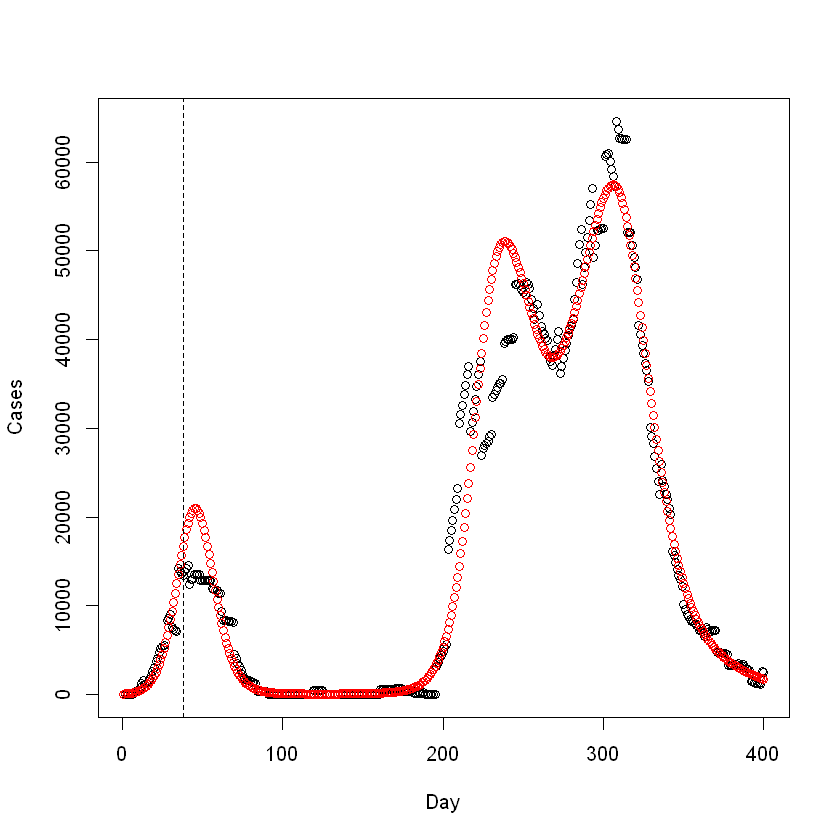

In [61]:
# Fit 
gam_daily_cases_devon_corrected <- mgcv::gam(ShiftedInfections ~ s(numericdate, bs = "cr"), data = daily_cases_devon_corrected, family = nb())

# Plot
plot(daily_cases_devon_corrected$ShiftedInfections,  ylab="Cases", xlab = "Day")
points(round(fitted.values(gam_daily_cases_devon_corrected)), col = "red")
abline(v = 38, lty = "dashed")

#### Add smoothed data to dataframe

In [63]:
gam_cases <- round(fitted.values(gam_daily_cases_devon_corrected))
# ## Join back to Devon daily data
gam_daily_cases_devon_corrected$SmoothedShiftedInfections <- gam_cases
gam_daily_cases_devon_corrected

# Save to csv
write.csv(daily_cases_devon_corrected, "gam_daily_cases_devon_corrected.csv", row.names = FALSE)


Family: Negative Binomial(0.492) 
Link function: log 

Formula:
ShiftedInfections ~ s(numericdate, bs = "cr")

Estimated degrees of freedom:
8.76  total = 9.76 

REML score: 3663.036     

#### Cumulative cases

In [55]:
# # Read in case data for all MSOAs in Devon
# cumulative_devon_cases <- read.csv("daily_cumcases_devon_corrected.csv")
# head(cumulative_devon_cases)

In [54]:
# # Convert format of date column
# cumulative_devon_cases$numericdate <-as.numeric(as.Date(cumulative_devon_cases$Date, format =  "%Y-%m-%d"))

# # Fit 
# gam_Devon <- mgcv::gam(ShiftedInfections ~ s(numericdate, bs = "cr"), data = cumulative_devon_cases, family = nb())
# # Plot
# plot(cumulative_devon_cases$ShiftedInfections,  ylab="Cases", xlab = "Day")
# points(round(fitted.values(gam_Devon)), col = "red")
# abline(v = 38, lty = "dashed")
# gam_cases <- round(fitted.values(gam_Devon))

# # ## Join back to one_msoa
# # one_msoa$gam_cases <- gam_cases
# # #
# # devon_gam_cases_msoa$col <-gam_cases

# # # rename
# # colnames(devon_gam_cases_msoa)[iter_i] <- col